In [1]:
import pandas as pd
import plotly
import mrob
import numpy as np
import scipy
import scipy.signal

import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
/home/nosmokingsurfer/miniconda3/envs/lyft_env/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [23]:
time = np.arange(0,50, step=0.005)

## Acceleration along x axis

In [24]:
trajectory = np.zeros((len(time),6 + 3 +3))

trajectory.shape

acc = 0.5 # g's

# acc noise

acc_measurement_noise = scipy.stats.norm(loc=0, scale=0.01).rvs(len(trajectory))


# motion noise
sigma = np.diag([0.1,0.01,0.01,0.1,0.1,0.1])
normal_noise = scipy.stats.multivariate_normal(cov=sigma)
noise = normal_noise.rvs(len(trajectory))




for i in range(len(trajectory)):
    acc_noise = np.random.rand()
    tmp = mrob.geometry.SE3([0,0,0,acc*time[i]**2/2,0,0])
    tmp.update_lhs(noise[i])
    
    trajectory[i][3] = tmp.Ln()[3]
    trajectory[i][6] = acc + acc_measurement_noise[i]

In [25]:
df = pd.DataFrame(trajectory, columns=['yaw', 'pitch','roll','x','y','z','acc_x', 'acc_y', 'acc_z', 'omega_x', 'omega_y','omega_z'])

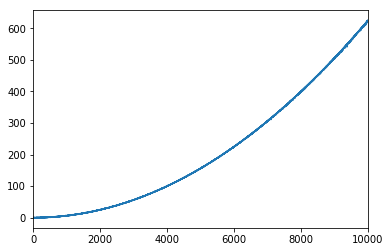

In [26]:
df.x.plot()

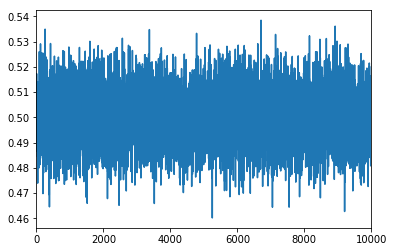

In [27]:
df.acc_x.plot()

In [28]:
df = df.set_index(time)
df.index.name='time[sec]'

In [29]:
len(df)

10000

In [30]:
df.to_csv('acceleration_along_straigt_line.csv')